In [1]:
# import sys
# import os
import matplotlib.pyplot as plt
# from netCDF4 import Dataset as netcdf_dataset
import numpy as np
import xarray as xr

from cartopy import config
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature 
# When data are defined in lat/lon coordinate system, PlateCarree()
# is the appropriate choice:

from cartopy.util import add_cyclic_point

import pandas as pd



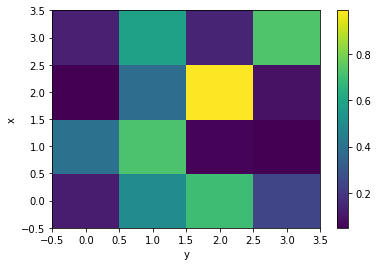

In [2]:
da = xr.DataArray(np.random.rand(4, 4),
                  [('x', np.arange(0,4)),
                    ('y', np.arange(0,4))])

da.plot.pcolormesh()

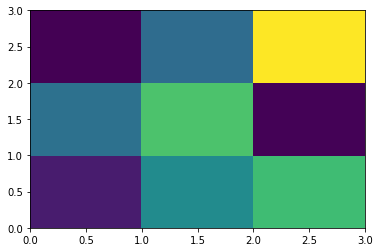

In [3]:
plt.pcolormesh(da.x, da.y, da)

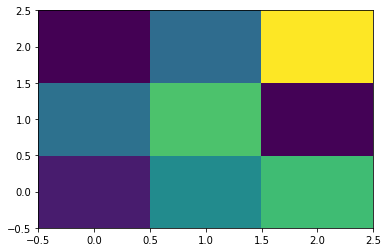

In [4]:
plt.pcolor(da.x-0.5, da.y-0.5, da)

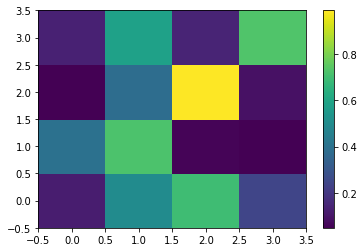

In [5]:
plt.pcolor(np.append(da.x.values,da.x.values[-1]+1)-0.5, np.append(da.y.values,da.y.values[-1]+1)-0.5, da)
plt.colorbar()

# Here the little script that Naomi put together to fix the Enso dates
# however soon the new xarray should be able to handle that


In [6]:
def to_pandas(Tgrid):
    """
    Parse the time grid of a Dataset and replace by a pandas time grid.
    """
    # first get the reference year from units
    words = Tgrid.units.split()
    ref_year = int(words[-1][0:4])
    # get the first time grid value
    first_time = Tgrid.values[0] - 0.5
    datetime = enso2date(first_time,ref_year)
    if 'months since' in Tgrid.units:
        return pd.date_range(datetime, periods=Tgrid.shape[0], freq='MS').shift(15, freq='D')
    elif 'days since' in Tgrid.units:
        return pd.date_range(datetime, periods=Tgrid.shape[0], freq='D')
    else:
        print('Unrecognized time grid')
        return
def enso2date(T0,ryear=1960,leap=True):
    norm = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    iy = ryear + int(T0/12)
    if T0 < 0:
        iy = iy - 1
    res = T0 - (iy - ryear)*12
    im = int(res) + 1
    if im == 13:
        im = 1
        iy = iy + 1
    if leap & (im == 2) &  (iy % 4 == 0 ):   
        id = 1 + int(29 * (res - int(res)))
    else:
        id = 1 + int(norm[im-1] * (res - int(res)))
    return str(im)+'/'+str(id)+'/'+str(iy)    

In [7]:
!wget 'http://kage.ldeo.columbia.edu:81/expert/%28/net/snefru/data/jennie/preciptrm2.nc%29readCDF/.TREND/prcp_anomaly/DATA/-40/40/RANGE//color_smoothing/null/def/SOURCES/.LDEO/.ClimateGroup/.PROJECTS/.IPCC/.CMIP5/.MoistureBudget/.mmm_22models_v3/.historical/.pr/.mmm/.mean/SOURCES/.LDEO/.ClimateGroup/.PROJECTS/.IPCC/.CMIP5/.MoistureBudget/.mmm_22models_v3/.rcp85/.pr/.mmm/.mean/appendstream/T/%28Nov%201901%29%28Dec%202014%29RANGE/yearly-climatology/T/%28Nov%29%28Feb%29RANGE%5BT%5Daverage/30.0/mul/DATA/30/STEP/%28/net/snefru/data/jennie/preciptrsig2.nc%29readCDF/.TRENDSIG/X/2/STEP/Y/2/STEP//name/%28u%29def/%28/net/snefru/data/jennie/preciptrsig2.nc%29readCDF/.TRENDSIG/X/2/STEP/Y/2/STEP//name/%28v%29def/-10/28/40/44/rect/X/Y/fig://CSCALE/0.05/def/colors/blue/contours/white/ocean/black/vectors/coasts/lakes/countries/white/ocean/black/coasts/white/ocean/black/coasts/red/medium/stroke/:fig/+//plotborder+72+psdef//plotaxislength+432+psdef+.gif'

--2019-04-04 10:19:28--  http://kage.ldeo.columbia.edu:81/expert/%28/net/snefru/data/jennie/preciptrm2.nc%29readCDF/.TREND/prcp_anomaly/DATA/-40/40/RANGE//color_smoothing/null/def/SOURCES/.LDEO/.ClimateGroup/.PROJECTS/.IPCC/.CMIP5/.MoistureBudget/.mmm_22models_v3/.historical/.pr/.mmm/.mean/SOURCES/.LDEO/.ClimateGroup/.PROJECTS/.IPCC/.CMIP5/.MoistureBudget/.mmm_22models_v3/.rcp85/.pr/.mmm/.mean/appendstream/T/%28Nov%201901%29%28Dec%202014%29RANGE/yearly-climatology/T/%28Nov%29%28Feb%29RANGE%5BT%5Daverage/30.0/mul/DATA/30/STEP/%28/net/snefru/data/jennie/preciptrsig2.nc%29readCDF/.TRENDSIG/X/2/STEP/Y/2/STEP//name/%28u%29def/%28/net/snefru/data/jennie/preciptrsig2.nc%29readCDF/.TRENDSIG/X/2/STEP/Y/2/STEP//name/%28v%29def/-10/28/40/44/rect/X/Y/fig://CSCALE/0.05/def/colors/blue/contours/white/ocean/black/vectors/coasts/lakes/countries/white/ocean/black/coasts/white/ocean/black/coasts/red/medium/stroke/:fig/+//plotborder+72+psdef//plotaxislength+432+psdef+.gif
Resolving kage.ldeo.columbia.edu

![Ingridfigure](plotaxislength+432+psdef+.gif)

In [8]:
data_jennie = xr.open_dataset('http://kage.ldeo.columbia.edu:81/expert/%28/net/snefru/data/jennie/preciptrm2.nc%29readCDF/.TREND/dods')

In [9]:
data_jennie

<xarray.Dataset>
Dimensions:  (X: 112, Y: 32)
Coordinates:
  * Y        (Y) float32 19.5 20.5 21.5 22.5 23.5 24.5 25.5 26.5 27.5 28.5 ...
  * X        (X) float32 -20.5 -19.5 -18.5 -17.5 -16.5 -15.5 -14.5 -13.5 ...
Data variables:
    TREND    (Y, X) float64 ...
Attributes:
    Conventions:  IRIDL

### I tried to extract the original data and do the analysis here, but unfortunately INGRID wasn't cooperating, so I had to get the results of the analysis as the output. However, in case you have access to the actual time series, the calculations would look something like as follows (it might have some bugs as Icouldn't check it but it is along these lines):

#### data_hist = xr.open_dataset('data_historical.nc', decode_times=False)
#### data_future = xr.open_dataset('data_future.nc', decode_times=False)

#### # for now fix the dates with Naomi's hack
#### data_hist['T'] = to_pandas(data_hist['T'])
#### data_future['T'] = to_pandas(data_future['T'])

#### # rename T as time, T is used to transpose things and can lead to confusion
#### data_hist = data_hist.rename({'T':'time'})
#### data_future = data_future.rename({'T':'time'})

#### # check that all their dimensions are named the same so they are merged without any problem, otherwise rename what is necessary

#### data_all = data_hist.merge(data_future)
#### # the data are appended to each other

#### # calculate monthly climatology - this will have a new dimension called month now, instead of time.
#### data_clim = data_all.groupby('time.month').mean(dim='time')

#### # mask everything except only Nov-Feb and do average
#### data_winterclim = data_clim.where((data_clim.month>10)&(data_clim.month<3)).mean(dim='month')



In [10]:
!wget 'http://kage.ldeo.columbia.edu:81/expert/SOURCES/.LDEO/.ClimateGroup/.PROJECTS/.IPCC/.CMIP5/.MoistureBudget/.mmm_22models_v3/.historical/.pr/.mmm/.mean/SOURCES/.LDEO/.ClimateGroup/.PROJECTS/.IPCC/.CMIP5/.MoistureBudget/.mmm_22models_v3/.rcp85/.pr/.mmm/.mean/appendstream/T/%28Nov%201901%29%28Dec%202014%29RANGE/yearly-climatology/T/%28Nov%29%28Feb%29RANGE%5BT%5Daverage/30.0/mul/data.cdf'

--2019-04-04 10:19:35--  http://kage.ldeo.columbia.edu:81/expert/SOURCES/.LDEO/.ClimateGroup/.PROJECTS/.IPCC/.CMIP5/.MoistureBudget/.mmm_22models_v3/.historical/.pr/.mmm/.mean/SOURCES/.LDEO/.ClimateGroup/.PROJECTS/.IPCC/.CMIP5/.MoistureBudget/.mmm_22models_v3/.rcp85/.pr/.mmm/.mean/appendstream/T/%28Nov%201901%29%28Dec%202014%29RANGE/yearly-climatology/T/%28Nov%29%28Feb%29RANGE%5BT%5Daverage/30.0/mul/data.cdf
Resolving kage.ldeo.columbia.edu... 129.236.21.133
Connecting to kage.ldeo.columbia.edu|129.236.21.133|:81... connected.
HTTP request sent, awaiting response... 200 OK
Length: 257580 (252K) [application/x-netcdf]
Saving to: ‘data.cdf.1’

data.cdf.1          100%[===================>] 251.54K  --.-KB/s    in 0.01s   

2019-04-04 10:19:36 (22.7 MB/s) - ‘data.cdf.1’ saved [257580/257580]



In [11]:
data_jennie_winterclim = xr.open_dataset('data.cdf',
                                        decode_times=False)

In [12]:
# change the mean field to mean_clim, because mean is the method to do the mean, and it could lead to confusion
data_jennie_winterclim
data_jennie_winterclim = data_jennie_winterclim.rename({'mean':'mean_clim'})


In [13]:
data_jennie_sign = xr.open_dataset('http://kage.ldeo.columbia.edu:81/expert/%28/net/snefru/data/jennie/preciptrsig2.nc%29readCDF/.TRENDSIG/dods')
data_jennie_sign

<xarray.Dataset>
Dimensions:   (X: 112, Y: 32)
Coordinates:
  * Y         (Y) float32 19.5 20.5 21.5 22.5 23.5 24.5 25.5 26.5 27.5 28.5 ...
  * X         (X) float32 -20.5 -19.5 -18.5 -17.5 -16.5 -15.5 -14.5 -13.5 ...
Data variables:
    TRENDSIG  (Y, X) float64 ...
Attributes:
    Conventions:  IRIDL

In [14]:
data_crs = ccrs.PlateCarree()   # since our data is on a rectangular lon,lat grid


In [15]:
import matplotlib as mpl

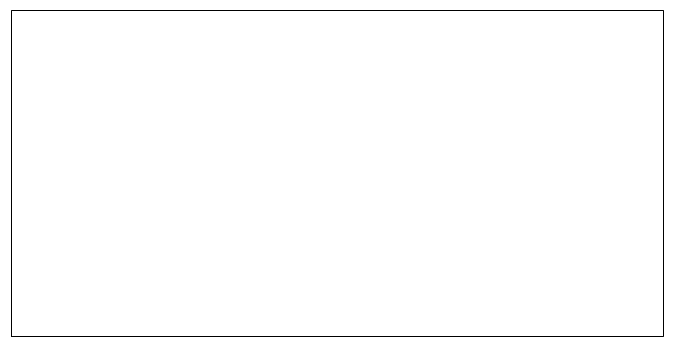

In [16]:
#SET UP
plt.figure(figsize=(25,6))
ax2 = plt.axes(projection=data_crs)

# the actual figure will have a different aspect ratio at the end, 
# because it will keep the correct aspect ratio for the data.
# sometimes this can be annoying when you want to place a colorbar/label somewhere, and it requires some trial and error


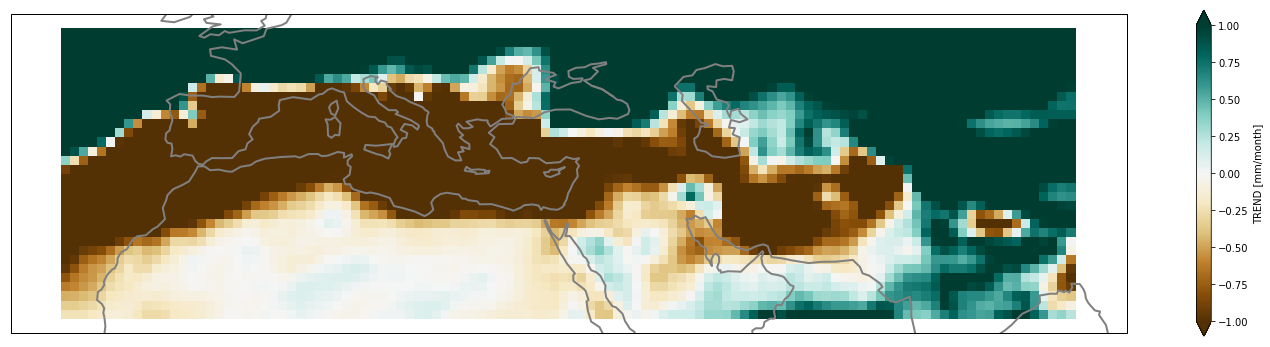

In [17]:
#SET UP
plt.figure(figsize=(25,6))
ax2 = plt.axes(projection=data_crs)

# http://xarray.pydata.org/en/stable/api.html#plotting
# DATA TRENDS
# https://matplotlib.org/examples/color/colormaps_reference.html
data_jennie.TREND.plot(ax=ax2, transform=data_crs, cmap = 'BrBG',
            vmin=-1., vmax=1.)
ax2.coastlines(lw=2,color='grey')

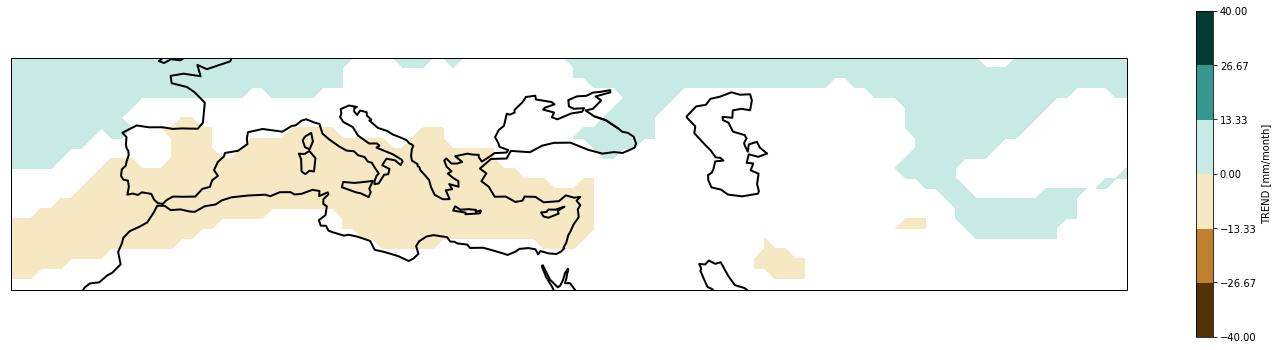

In [18]:
#SET UP
plt.figure(figsize=(25,6))
ax2 = plt.axes(projection=data_crs)

# http://xarray.pydata.org/en/stable/api.html#plotting
# DATA TRENDS
# https://matplotlib.org/examples/color/colormaps_reference.html
data_jennie.TREND.where((data_jennie.TREND>2)+(data_jennie.TREND<-2)).plot.contourf(ax=ax2, 
                                    transform=data_crs, cmap = 'BrBG',
                                    vmin=-40., vmax=40.)
ax2.coastlines(lw=2)

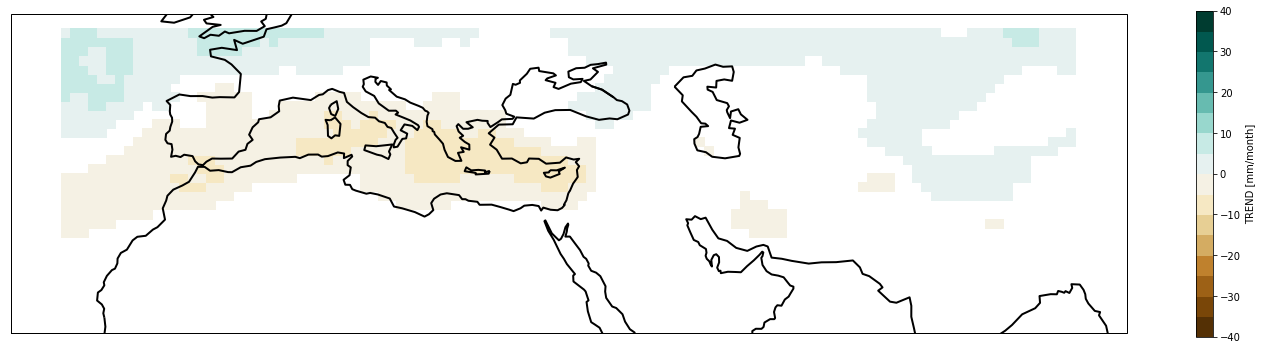

In [19]:
#SET UP
plt.figure(figsize=(25,6))
ax2 = plt.axes(projection=data_crs)

levels_jennie = np.arange(-40,45,5)
# http://xarray.pydata.org/en/stable/api.html#plotting
# DATA TRENDS
# https://matplotlib.org/examples/color/colormaps_reference.html
data_jennie.TREND.where((data_jennie.TREND>2)+(data_jennie.TREND<-2)).plot(ax=ax2, 
                                    transform=data_crs, cmap = 'BrBG',
                                    vmin=-40., vmax=40., 
                                    # https://matplotlib.org/users/colormapnorms.html
                                    norm = mpl.colors.BoundaryNorm(levels_jennie, plt.cm.BrBG.N),
                                                                          zorder=1)
                                    # this zorder will allow us to place things in the order we want
                                    # https://matplotlib.org/examples/pylab_examples/zorder_demo.html

ax2.coastlines(lw=2)

### Alternatively I can use contourf, which will use
#### https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contourf.html
### so it will loose the grid-like appearance, and will do some interpolation
### I provide the levels, and that automatically will adjust the colorbar

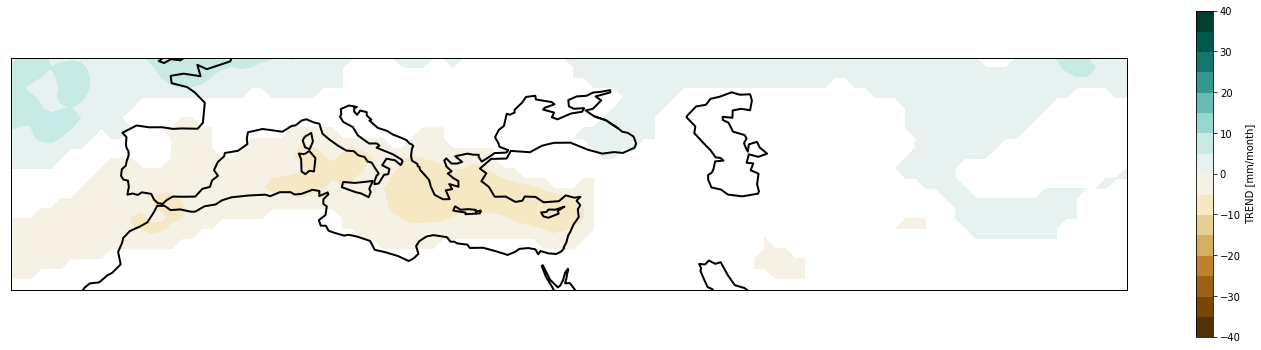

In [20]:
#SET UP
plt.figure(figsize=(25,6))
ax2 = plt.axes(projection=data_crs)

levels_jennie = np.arange(-40,45,5)
# http://xarray.pydata.org/en/stable/api.html#plotting
# DATA TRENDS
# https://matplotlib.org/examples/color/colormaps_reference.html
data_jennie.TREND.where((data_jennie.TREND>2)+(data_jennie.TREND<-2)).plot.contourf(ax=ax2, 
                                    transform=data_crs, cmap = 'BrBG',
                                    vmin=-40., vmax=40., levels=levels_jennie,
                                    # https://matplotlib.org/users/colormapnorms.html
                                                                          zorder=1)
ax2.coastlines(lw=2)

#### let's add the contours

/home2/nhn2/miniconda3/envs/pangeo/lib/python3.6/site-packages/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


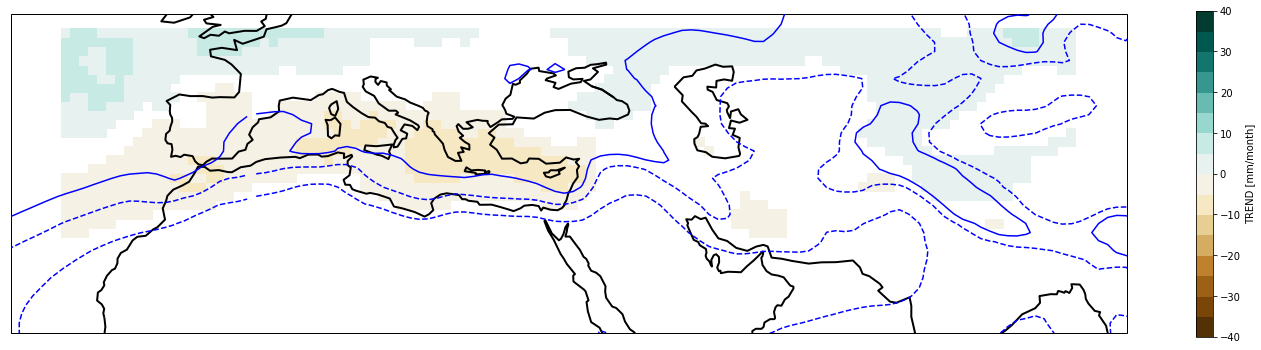

In [21]:
#SET UP
plt.figure(figsize=(25,6))
ax2 = plt.axes(projection=data_crs)

levels_jennie = np.arange(-40,45,5)
# http://xarray.pydata.org/en/stable/api.html#plotting
# DATA TRENDS
# https://matplotlib.org/examples/color/colormaps_reference.html
data_jennie.TREND.where((data_jennie.TREND>2)+(data_jennie.TREND<-2)).plot(ax=ax2, 
                                    transform=data_crs, cmap = 'BrBG',
                                    vmin=-40., vmax=40., 
                                    # https://matplotlib.org/users/colormapnorms.html
                                    norm = mpl.colors.BoundaryNorm(levels_jennie, plt.cm.BrBG.N),
                                                                          zorder=1)
                                    # this zorder will allow us to place things in the order we want
                                    # https://matplotlib.org/examples/pylab_examples/zorder_demo.html

ax2.coastlines(lw=2)

# CONTOUR 10 and 30 dashed - once again I use contour (not contourf because i don't want the contour filled)
# and I define the levels to use to draw them
CS1 = data_jennie_winterclim.mean_clim.plot.contour(ax=ax2, transform=data_crs,
                                             levels=[10,30],
                                              colors='blue',
                                             linestyles='dashed',      
#                                              add_colorbar=True,
                                             add_labels=True,
                                            zorder=4)
# CONTOUR 50 solid
CS2 = data_jennie_winterclim.mean_clim.plot.contour(ax=ax2, transform=data_crs,
                                             levels=[50],
                                              colors='blue',
                                             linestyles='solid',      
#                                              add_colorbar=True,
                                             add_labels=True,
                                            zorder=5)


#### Now I need to add the labels. These are properties that need to be added after. 
#### we use the CS objects to tell python which we want to modify

In [22]:
CS1

<a list of 15 text.Text objects>

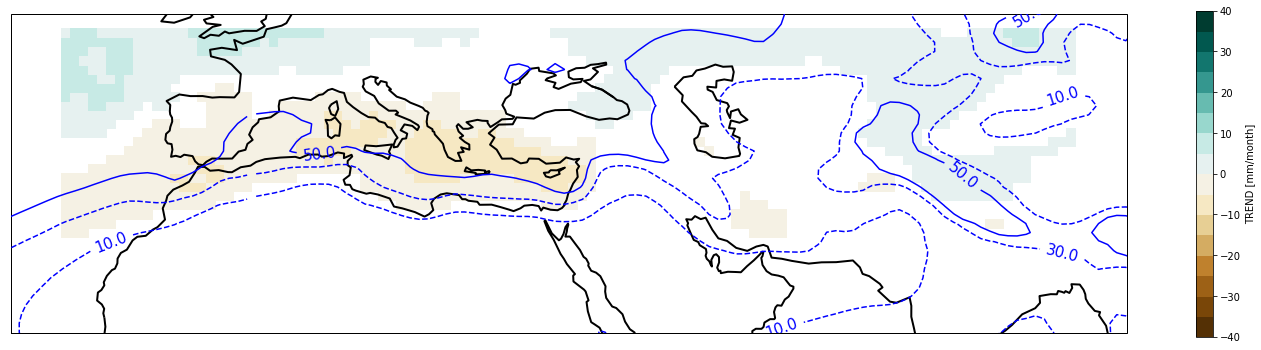

In [23]:
#SET UP
plt.figure(figsize=(25,6))
ax2 = plt.axes(projection=data_crs)

levels_jennie = np.arange(-40,45,5)
# http://xarray.pydata.org/en/stable/api.html#plotting
# DATA TRENDS
# https://matplotlib.org/examples/color/colormaps_reference.html
data_jennie.TREND.where((data_jennie.TREND>2)+(data_jennie.TREND<-2)).plot(ax=ax2, 
                                    transform=data_crs, cmap = 'BrBG',
                                    vmin=-40., vmax=40., 
                                    # https://matplotlib.org/users/colormapnorms.html
                                    norm = mpl.colors.BoundaryNorm(levels_jennie, plt.cm.BrBG.N),
                                                                          zorder=1)
                                    # this zorder will allow us to place things in the order we want
                                    # https://matplotlib.org/examples/pylab_examples/zorder_demo.html

ax2.coastlines(lw=2)

# CONTOUR 10 and 30 dashed - once again I use contour (not contourf because i don't want the contour filled)
# and I define the levels to use to draw them
CS1 = data_jennie_winterclim.mean_clim.plot.contour(ax=ax2, transform=data_crs,
                                             levels=[10,30],
                                              colors='blue',
                                             linestyles='dashed',      
#                                              add_colorbar=True,
                                             add_labels=True,
                                            zorder=4) 
                                            # note the order, I left some gaps, because I want to put layers in betweene
# CONTOUR 50 solid
CS2 = data_jennie_winterclim.mean_clim.plot.contour(ax=ax2, transform=data_crs,
                                             levels=[50],
                                              colors='blue',
                                             linestyles='solid',      
#                                              add_colorbar=True,
                                             add_labels=True,
                                            zorder=5)
ax2.clabel(CS1, 
           inline=1, #it puts them inline with the line and leaves a empty space
           fontsize=15,
           fmt='%1.1f') #format
ax2.clabel(CS2, 
           inline=1, 
           fontsize=15,
           fmt='%1.1f')


#### Now I add the rectangle

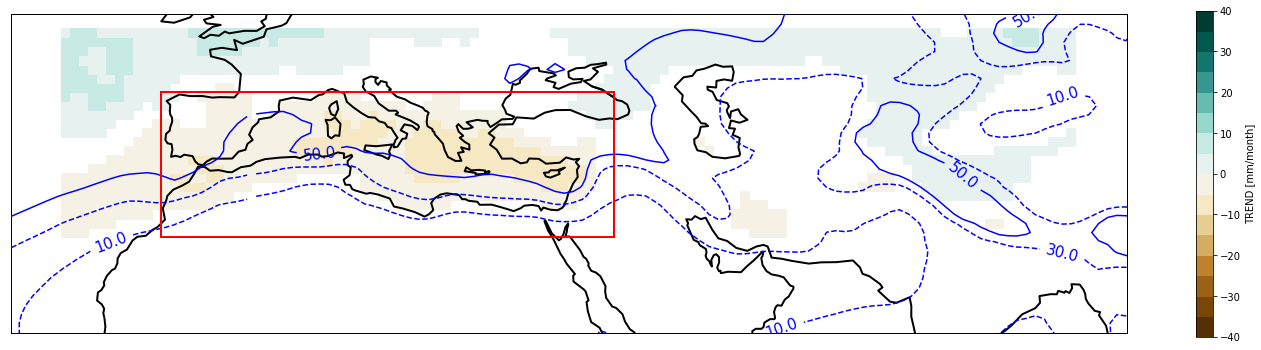

In [24]:
#SET UP
plt.figure(figsize=(25,6))
ax2 = plt.axes(projection=data_crs)

levels_jennie = np.arange(-40,45,5)
# http://xarray.pydata.org/en/stable/api.html#plotting
# DATA TRENDS
# https://matplotlib.org/examples/color/colormaps_reference.html
data_jennie.TREND.where((data_jennie.TREND>2)+(data_jennie.TREND<-2)).plot(ax=ax2, 
                                    transform=data_crs, cmap = 'BrBG',
                                    vmin=-40., vmax=40., 
                                    # https://matplotlib.org/users/colormapnorms.html
                                    norm = mpl.colors.BoundaryNorm(levels_jennie, plt.cm.BrBG.N),
                                                                          zorder=1)
                                    # this zorder will allow us to place things in the order we want
                                    # https://matplotlib.org/examples/pylab_examples/zorder_demo.html

ax2.coastlines(lw=2)

# CONTOUR 10 and 30 dashed - once again I use contour (not contourf because i don't want the contour filled)
# and I define the levels to use to draw them
CS1 = data_jennie_winterclim.mean_clim.plot.contour(ax=ax2, transform=data_crs,
                                             levels=[10,30],
                                              colors='blue',
                                             linestyles='dashed',      
#                                              add_colorbar=True,
                                             add_labels=True,
                                            zorder=4) 
                                            # note the order, I left some gaps, because I want to put layers in betweene
# CONTOUR 50 solid
CS2 = data_jennie_winterclim.mean_clim.plot.contour(ax=ax2, transform=data_crs,
                                             levels=[50],
                                              colors='blue',
                                             linestyles='solid',      
#                                              add_colorbar=True,
                                             add_labels=True,
                                            zorder=5)
ax2.clabel(CS1, 
           inline=1, #it puts them inline with the line and leaves a empty space
           fontsize=15,
           fmt='%1.1f') #format
ax2.clabel(CS2, 
           inline=1, 
           fontsize=15,
           fmt='%1.1f')

# RECTANGLE
# http://matthiaseisen.com/pp/patterns/p0203/
import matplotlib.patches as patches
ax2.add_patch(patches.Rectangle(
        (-10, 28),   # (x,y)
        (40- (-10)),          # width
        (44-28),          # height
        linewidth=2,edgecolor='r',facecolor='none',
                                            zorder=100)) #top of everything


#### Now to the significance hatching; in INGRID she uses quiver as the trick, in matplotlib you have a wide selection of hatching symbols
#### https://matplotlib.org/examples/pylab_examples/hatch_demo.html
#### https://matplotlib.org/examples/pylab_examples/contourf_hatching.html

#### There are various ways you can obtain the hatching. The easiest is to use the contourf and create an area that can be contoured and filled with the hatch symbol 

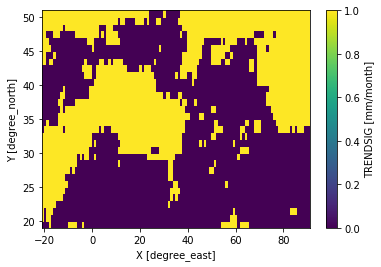

In [25]:
data_jennie_sign.TRENDSIG.plot()

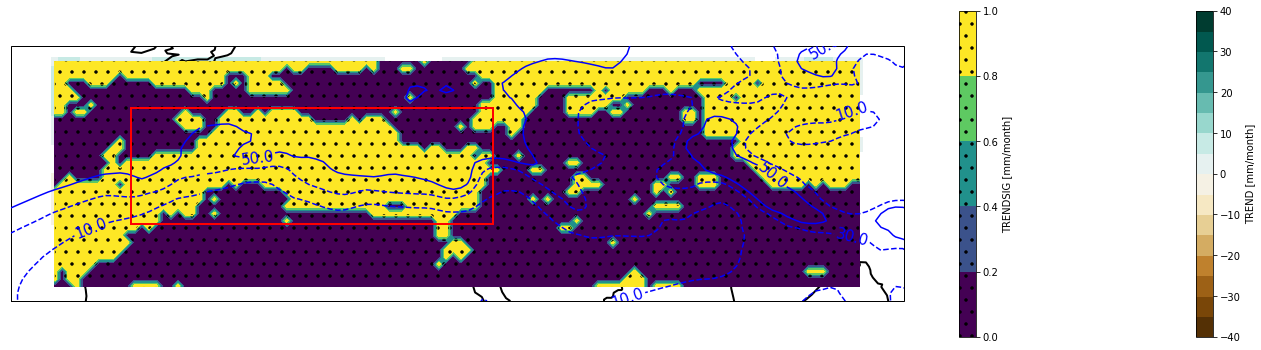

In [26]:
#SET UP
plt.figure(figsize=(25,6))
ax2 = plt.axes(projection=data_crs)

levels_jennie = np.arange(-40,45,5)
# http://xarray.pydata.org/en/stable/api.html#plotting
# DATA TRENDS
# https://matplotlib.org/examples/color/colormaps_reference.html
data_jennie.TREND.where((data_jennie.TREND>2)+(data_jennie.TREND<-2)).plot(ax=ax2, 
                                    transform=data_crs, cmap = 'BrBG',
                                    vmin=-40., vmax=40., 
                                    # https://matplotlib.org/users/colormapnorms.html
                                    norm = mpl.colors.BoundaryNorm(levels_jennie, plt.cm.BrBG.N),
                                                                          zorder=1)
                                    # this zorder will allow us to place things in the order we want
                                    # https://matplotlib.org/examples/pylab_examples/zorder_demo.html

ax2.coastlines(lw=2)

# CONTOUR 10 and 30 dashed - once again I use contour (not contourf because i don't want the contour filled)
# and I define the levels to use to draw them
CS1 = data_jennie_winterclim.mean_clim.plot.contour(ax=ax2, transform=data_crs,
                                             levels=[10,30],
                                              colors='blue',
                                             linestyles='dashed',      
#                                              add_colorbar=True,
                                             add_labels=True,
                                            zorder=4) 
                                            # note the order, I left some gaps, because I want to put layers in betweene
# CONTOUR 50 solid
CS2 = data_jennie_winterclim.mean_clim.plot.contour(ax=ax2, transform=data_crs,
                                             levels=[50],
                                              colors='blue',
                                             linestyles='solid',      
#                                              add_colorbar=True,
                                             add_labels=True,
                                            zorder=5)
ax2.clabel(CS1, 
           inline=1, #it puts them inline with the line and leaves a empty space
           fontsize=15,
           fmt='%1.1f') #format
ax2.clabel(CS2, 
           inline=1, 
           fontsize=15,
           fmt='%1.1f')

# RECTANGLE
# http://matthiaseisen.com/pp/patterns/p0203/
import matplotlib.patches as patches
ax2.add_patch(patches.Rectangle(
        (-10, 28),   # (x,y)
        (40- (-10)),          # width
        (44-28),          # height
        linewidth=2,edgecolor='r',facecolor='none',
                                            zorder=100)) #top of everything

# HATCH PLOT  POSSIBLE within contourf
# https://matplotlib.org/examples/pylab_examples/contourf_hatching.html
data_jennie_sign.TRENDSIG.plot.contourf(ax=ax2, transform=data_crs,
                                                                           hatches='.',
#                                                                            alpha=0,
#                                                                           add_colorbar=False,
                                                                            zorder=2)


because we are using contourf it does interpolate on the edges, and we don't want to do that and maybe misrepresent the data; so I can first mask everything and then use contour

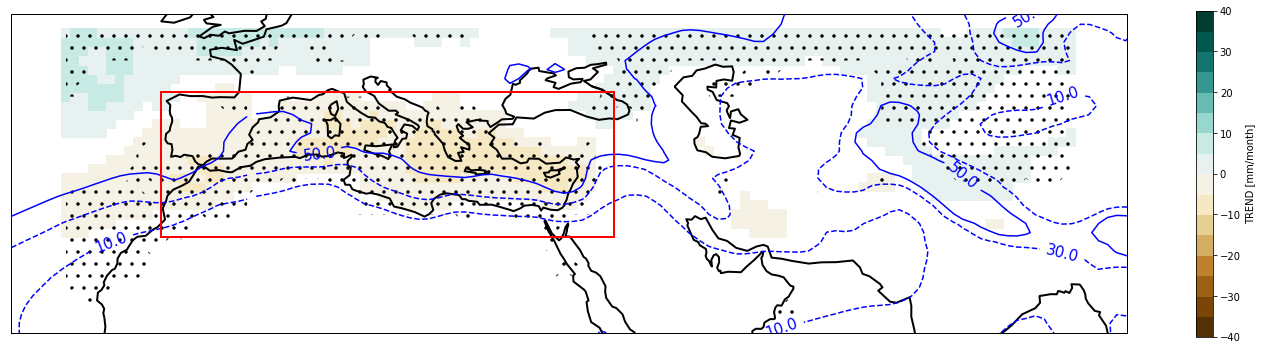

In [27]:
#SET UP
plt.figure(figsize=(25,6))
ax2 = plt.axes(projection=data_crs)

levels_jennie = np.arange(-40,45,5)
# http://xarray.pydata.org/en/stable/api.html#plotting
# DATA TRENDS
# https://matplotlib.org/examples/color/colormaps_reference.html
data_jennie.TREND.where((data_jennie.TREND>2)+(data_jennie.TREND<-2)).plot(ax=ax2, 
                                    transform=data_crs, cmap = 'BrBG',
                                    vmin=-40., vmax=40., 
                                    # https://matplotlib.org/users/colormapnorms.html
                                    norm = mpl.colors.BoundaryNorm(levels_jennie, plt.cm.BrBG.N),
                                                                          zorder=1)
                                    # this zorder will allow us to place things in the order we want
                                    # https://matplotlib.org/examples/pylab_examples/zorder_demo.html

ax2.coastlines(lw=2)

# CONTOUR 10 and 30 dashed - once again I use contour (not contourf because i don't want the contour filled)
# and I define the levels to use to draw them
CS1 = data_jennie_winterclim.mean_clim.plot.contour(ax=ax2, transform=data_crs,
                                             levels=[10,30],
                                              colors='blue',
                                             linestyles='dashed',      
#                                              add_colorbar=True,
                                             add_labels=True,
                                            zorder=4) 
                                            # note the order, I left some gaps, because I want to put layers in betweene
# CONTOUR 50 solid
CS2 = data_jennie_winterclim.mean_clim.plot.contour(ax=ax2, transform=data_crs,
                                             levels=[50],
                                              colors='blue',
                                             linestyles='solid',      
#                                              add_colorbar=True,
                                             add_labels=True,
                                            zorder=5)
ax2.clabel(CS1, 
           inline=1, #it puts them inline with the line and leaves a empty space
           fontsize=15,
           fmt='%1.1f') #format
ax2.clabel(CS2, 
           inline=1, 
           fontsize=15,
           fmt='%1.1f')

# RECTANGLE
# http://matthiaseisen.com/pp/patterns/p0203/
import matplotlib.patches as patches
ax2.add_patch(patches.Rectangle(
        (-10, 28),   # (x,y)
        (40- (-10)),          # width
        (44-28),          # height
        linewidth=2,edgecolor='r',facecolor='none',
                                            zorder=100)) #top of everything

# HATCH PLOT  POSSIBLE within contourf
# https://matplotlib.org/examples/pylab_examples/contourf_hatching.html
# I mask with where() everything that shouldn't be plotted
data_jennie_sign.TRENDSIG.where(data_jennie_sign.TRENDSIG>0).plot.contourf(ax=ax2, transform=data_crs,
#                                        levels=[0,0.1,1], # Not necessary because of where()
                                       hatches=['.'],
                                       alpha=0, # gets rid of the color
                                      add_colorbar=False, # gets rid of the colorbar
                                        zorder=2) # order of the plot


#### Add coordinates etc


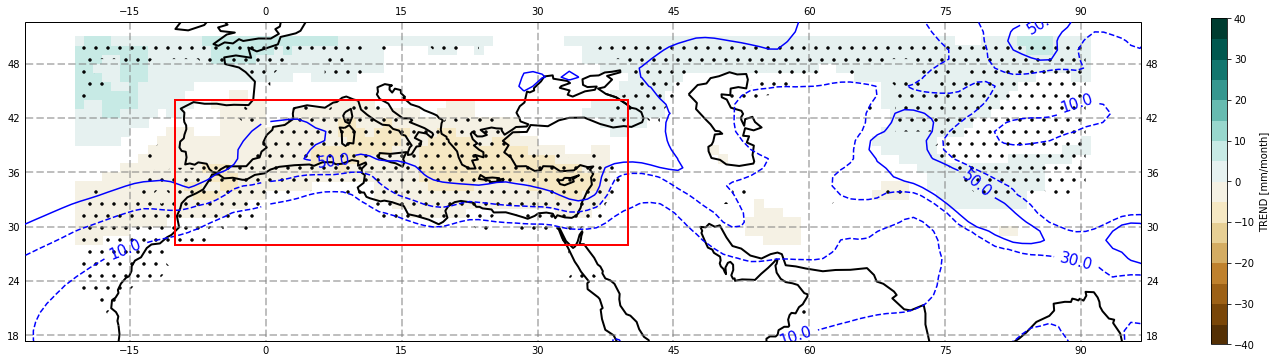

In [28]:
#SET UP
plt.figure(figsize=(25,6))
ax2 = plt.axes(projection=data_crs)

levels_jennie = np.arange(-40,45,5)
# http://xarray.pydata.org/en/stable/api.html#plotting
# DATA TRENDS
# https://matplotlib.org/examples/color/colormaps_reference.html
data_jennie.TREND.where((data_jennie.TREND>2)+(data_jennie.TREND<-2)).plot(ax=ax2, 
                                    transform=data_crs, cmap = 'BrBG',
                                    vmin=-40., vmax=40., 
                                    # https://matplotlib.org/users/colormapnorms.html
                                    norm = mpl.colors.BoundaryNorm(levels_jennie, plt.cm.BrBG.N),
                                                                          zorder=1)
                                    # this zorder will allow us to place things in the order we want
                                    # https://matplotlib.org/examples/pylab_examples/zorder_demo.html

ax2.coastlines(lw=2)

# CONTOUR 10 and 30 dashed - once again I use contour (not contourf because i don't want the contour filled)
# and I define the levels to use to draw them
CS1 = data_jennie_winterclim.mean_clim.plot.contour(ax=ax2, transform=data_crs,
                                             levels=[10,30],
                                              colors='blue',
                                             linestyles='dashed',      
#                                              add_colorbar=True,
                                             add_labels=True,
                                            zorder=4) 
                                            # note the order, I left some gaps, because I want to put layers in betweene
# CONTOUR 50 solid
CS2 = data_jennie_winterclim.mean_clim.plot.contour(ax=ax2, transform=data_crs,
                                             levels=[50],
                                              colors='blue',
                                             linestyles='solid',      
#                                              add_colorbar=True,
                                             add_labels=True,
                                            zorder=5)
ax2.clabel(CS1, 
           inline=1, #it puts them inline with the line and leaves a empty space
           fontsize=15,
           fmt='%1.1f') #format
ax2.clabel(CS2, 
           inline=1, 
           fontsize=15,
           fmt='%1.1f')

# RECTANGLE
# http://matthiaseisen.com/pp/patterns/p0203/
import matplotlib.patches as patches
ax2.add_patch(patches.Rectangle(
        (-10, 28),   # (x,y)
        (40- (-10)),          # width
        (44-28),          # height
        linewidth=2,edgecolor='r',facecolor='none',
                                            zorder=100)) #top of everything

# HATCH PLOT  POSSIBLE within contourf
# https://matplotlib.org/examples/pylab_examples/contourf_hatching.html
# I mask with where() everything that shouldn't be plotted
data_jennie_sign.TRENDSIG.where(data_jennie_sign.TRENDSIG>0).plot.contourf(ax=ax2, transform=data_crs,
#                                        levels=[0,0.1,1], # Not necessary because of where()
                                       hatches=['.'],
                                       alpha=0, # gets rid of the color
                                      add_colorbar=False, # gets rid of the colorbar
                                        zorder=2) # order of the plot

gl = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
lon_formatter = LongitudeFormatter(zero_direction_label=True)

plt.savefig('jenniemap_contourf.png', bbox_inches="tight")

### USing Quiver

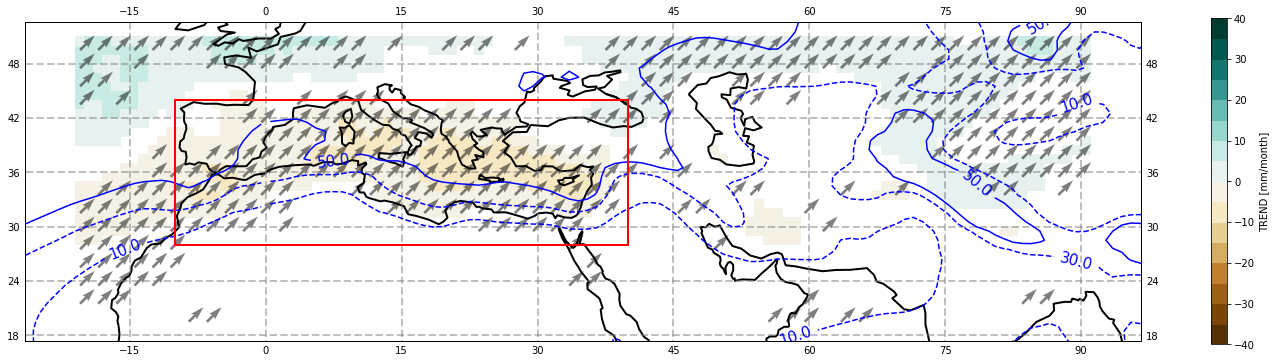

In [29]:
#SET UP
plt.figure(figsize=(25,6))
ax2 = plt.axes(projection=data_crs)

levels_jennie = np.arange(-40,45,5)
# http://xarray.pydata.org/en/stable/api.html#plotting
# DATA TRENDS
# https://matplotlib.org/examples/color/colormaps_reference.html
data_jennie.TREND.where((data_jennie.TREND>2)+(data_jennie.TREND<-2)).plot(ax=ax2, 
                                    transform=data_crs, cmap = 'BrBG',
                                    vmin=-40., vmax=40., 
                                    # https://matplotlib.org/users/colormapnorms.html
                                    norm = mpl.colors.BoundaryNorm(levels_jennie, plt.cm.BrBG.N),
                                                                          zorder=1)
                                    # this zorder will allow us to place things in the order we want
                                    # https://matplotlib.org/examples/pylab_examples/zorder_demo.html

ax2.coastlines(lw=2)

# CONTOUR 10 and 30 dashed - once again I use contour (not contourf because i don't want the contour filled)
# and I define the levels to use to draw them
CS1 = data_jennie_winterclim.mean_clim.plot.contour(ax=ax2, transform=data_crs,
                                             levels=[10,30],
                                              colors='blue',
                                             linestyles='dashed',      
#                                              add_colorbar=True,
                                             add_labels=True,
                                            zorder=4) 
                                            # note the order, I left some gaps, because I want to put layers in betweene
# CONTOUR 50 solid
CS2 = data_jennie_winterclim.mean_clim.plot.contour(ax=ax2, transform=data_crs,
                                             levels=[50],
                                              colors='blue',
                                             linestyles='solid',      
#                                              add_colorbar=True,
                                             add_labels=True,
                                            zorder=5)
ax2.clabel(CS1, 
           inline=1, #it puts them inline with the line and leaves a empty space
           fontsize=15,
           fmt='%1.1f') #format
ax2.clabel(CS2, 
           inline=1, 
           fontsize=15,
           fmt='%1.1f')

# RECTANGLE
# http://matthiaseisen.com/pp/patterns/p0203/
import matplotlib.patches as patches
ax2.add_patch(patches.Rectangle(
        (-10, 28),   # (x,y)
        (40- (-10)),          # width
        (44-28),          # height
        linewidth=2,edgecolor='r',facecolor='none',
                                            zorder=100)) #top of everything

# # HATCH PLOT  POSSIBLE within contourf
# # https://matplotlib.org/examples/pylab_examples/contourf_hatching.html
# # I mask with where() everything that shouldn't be plotted
# data_jennie_sign.TRENDSIG.where(data_jennie_sign.TRENDSIG>0).plot.contourf(ax=ax2, transform=data_crs,
# #                                        levels=[0,0.1,1], # Not necessary because of where()
#                                        hatches=['.'],
#                                        alpha=0, # gets rid of the color
#                                       add_colorbar=False, # gets rid of the colorbar
#                                         zorder=2) # order of the plot


# QUIVER PLOT
U = data_jennie_sign.TRENDSIG.values
V = data_jennie_sign.TRENDSIG.values
#https://matplotlib.org/gallery/images_contours_and_fields/quiver_simple_demo.html#sphx-glr-gallery-images-contours-and-fields-quiver-simple-demo-py
#https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.quiver.html
q = ax2.quiver(data_jennie_sign.X[::2], data_jennie_sign.Y[::2], 
               np.ma.masked_equal(U[::2,::2],0),
               np.ma.masked_equal(V[::2,::2],0),
             transform=data_crs,             
              alpha=0.5,
              zorder=2)

gl = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
lon_formatter = LongitudeFormatter(zero_direction_label=True)

plt.savefig('jenniemap_quiver.png', bbox_inches="tight")


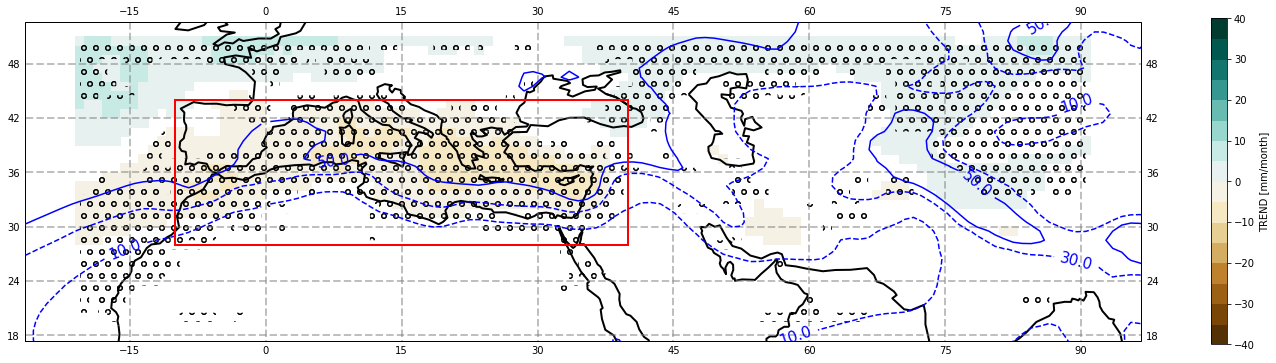

In [30]:
#SET UP
plt.figure(figsize=(25,6))
ax2 = plt.axes(projection=data_crs)

levels_jennie = np.arange(-40,45,5)
# http://xarray.pydata.org/en/stable/api.html#plotting
# DATA TRENDS
# https://matplotlib.org/examples/color/colormaps_reference.html
data_jennie.TREND.where((data_jennie.TREND>2)+(data_jennie.TREND<-2)).plot(ax=ax2, 
                                    transform=data_crs, cmap = 'BrBG',
                                    vmin=-40., vmax=40., 
                                    # https://matplotlib.org/users/colormapnorms.html
                                    norm = mpl.colors.BoundaryNorm(levels_jennie, plt.cm.BrBG.N),
                                                                          zorder=1)
                                    # this zorder will allow us to place things in the order we want
                                    # https://matplotlib.org/examples/pylab_examples/zorder_demo.html

ax2.coastlines(lw=2)

# CONTOUR 10 and 30 dashed - once again I use contour (not contourf because i don't want the contour filled)
# and I define the levels to use to draw them
CS1 = data_jennie_winterclim.mean_clim.plot.contour(ax=ax2, transform=data_crs,
                                             levels=[10,30],
                                              colors='blue',
                                             linestyles='dashed',      
#                                              add_colorbar=True,
                                             add_labels=True,
                                            zorder=4) 
                                            # note the order, I left some gaps, because I want to put layers in betweene
# CONTOUR 50 solid
CS2 = data_jennie_winterclim.mean_clim.plot.contour(ax=ax2, transform=data_crs,
                                             levels=[50],
                                              colors='blue',
                                             linestyles='solid',      
#                                              add_colorbar=True,
                                             add_labels=True,
                                            zorder=5)
ax2.clabel(CS1, 
           inline=1, #it puts them inline with the line and leaves a empty space
           fontsize=15,
           fmt='%1.1f') #format
ax2.clabel(CS2, 
           inline=1, 
           fontsize=15,
           fmt='%1.1f')

# RECTANGLE
# http://matthiaseisen.com/pp/patterns/p0203/
import matplotlib.patches as patches
ax2.add_patch(patches.Rectangle(
        (-10, 28),   # (x,y)
        (40- (-10)),          # width
        (44-28),          # height
        linewidth=2,edgecolor='r',facecolor='none',
                                            zorder=100)) #top of everything

# # HATCH PLOT  POSSIBLE within contourf
# # https://matplotlib.org/examples/pylab_examples/contourf_hatching.html
# # I mask with where() everything that shouldn't be plotted
# data_jennie_sign.TRENDSIG.where(data_jennie_sign.TRENDSIG>0).plot.contourf(ax=ax2, transform=data_crs,
# #                                        levels=[0,0.1,1], # Not necessary because of where()
#                                        hatches=['.'],
#                                        alpha=0, # gets rid of the color
#                                       add_colorbar=False, # gets rid of the colorbar
#                                         zorder=2) # order of the plot


# using PCOLOR PLOT
ax2.pcolor(data_jennie_sign.X, data_jennie_sign.Y,data_jennie_sign.TRENDSIG.where(data_jennie_sign.TRENDSIG>0),
          hatch='o', alpha=0,
           transform=data_crs,
          zorder=2)


gl = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
lon_formatter = LongitudeFormatter(zero_direction_label=True)


plt.savefig('jenniemap_pcolor.png', bbox_inches="tight")   # important to add tight to avoid chopping of png